In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [5]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

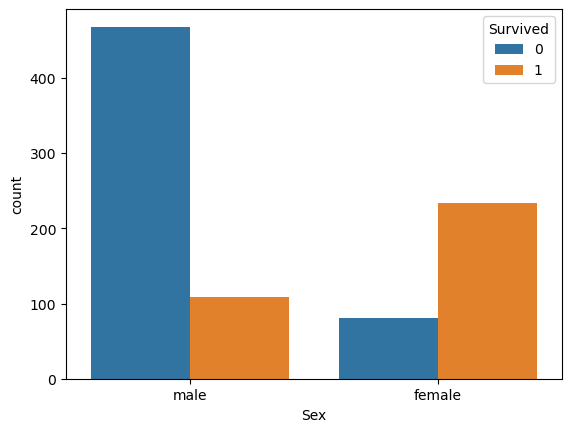

In [11]:
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.show()

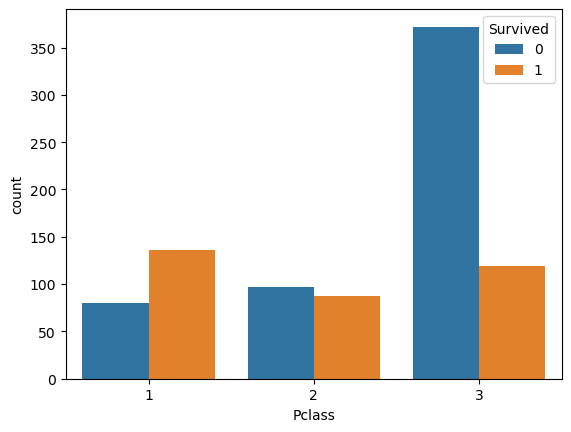

In [16]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.show()

In [34]:
print("Missing values in training data:")
print(train_data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())

Missing values in training data:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [57]:
print("Column names in training data:", train_data.columns)
print("Column names in test data:", test_data.columns)

Column names in training data: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Column names in test data: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [62]:
print("\nProcessed Training Data:")
print(train_data.head())
print("\nProcessed Test Data:")
print(test_data.head())


Processed Training Data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Processed Test Data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [104]:
# Check if 'Age' column exists in train_data and test_data
print("Age in train_data:", 'Age' in train_data.columns)
print("Age in test_data:", 'Age' in test_data.columns)


Age in train_data: False
Age in test_data: False


In [110]:
print("Columns in train_data:", train_data.columns.tolist())
print("Columns in test_data:", test_data.columns.tolist())

Columns in train_data: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Columns in test_data: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [128]:
print(train_data['Sex'].unique())  # Should show ['male', 'female'] (or similar)
print(test_data['Sex'].unique())   # Should show ['male', 'female'] (or similar)


[1 0]
['male' 'female']


In [143]:
# Check if 'Age' column exists in test_data
print(test_data.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [149]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [171]:
print(train_data['Embarked'].isnull().sum())


0


In [173]:
print(train_data['Embarked'].mode())


0    2
Name: Embarked, dtype: int32


In [179]:
print(train_data['Embarked'].isnull().sum()) 


0


In [181]:
mode_value = train_data['Embarked'].mode()[0] if not train_data['Embarked'].mode().empty else 'S'
print(f"Mode value for Embarked: {mode_value}")


Mode value for Embarked: 2


In [176]:
# Dictionary mapping encoded values to original values
label_mapping = {0: 'S', 1: 'C', 2: 'Q'}

# Get the mode value (which will be an integer due to LabelEncoder)
mode_value_encoded = train_data['Embarked_S'].mode()[0]

# Map the mode value to the original categorical label
mode_value = label_mapping.get(mode_value_encoded, 'S')  # Default to 'S' if not found

print(f"Mode value for Embarked (as a label): {mode_value}")


Mode value for Embarked (as a label): C


In [191]:
# Check the columns in train_data
print(train_data.columns)

# Drop only the columns that exist in the dataset
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]

# Drop the existing columns
train_data.drop(columns_to_drop, axis=1, inplace=True)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [201]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training data to verify it is loaded correctly
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [211]:
test_df['Fare'] = pd.to_numeric(test_df['Fare'], errors='coerce')

In [213]:
print(test_df['Fare'].isnull().sum())

0


In [215]:
# Ensure 'Fare' is numeric
test_df['Fare'] = pd.to_numeric(test_df['Fare'], errors='coerce')
# Verify the fill worked
print(test_df['Fare'].isnull().sum())  # This should return 0 if no missing values remain


0


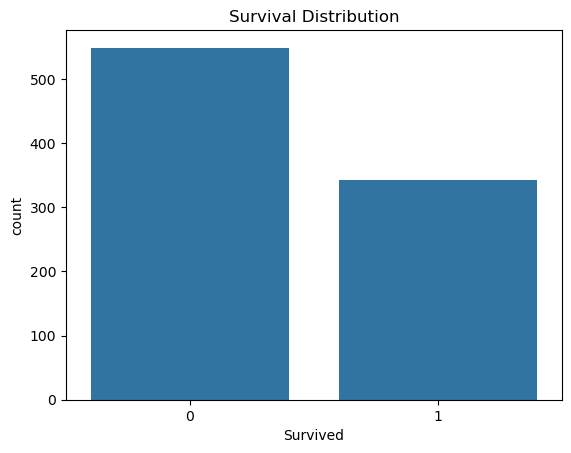

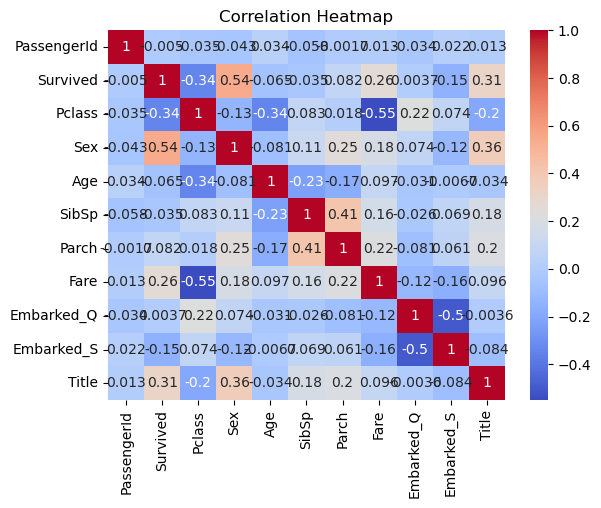

In [219]:
# Check for missing values
train_df.isnull().sum()

# Check the basic statistics of the dataset
train_df.describe()

# Visualize the distribution of survival
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

# Explore correlation between features
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [223]:
if 'Cabin' in train_df.columns:
    train_df.drop('Cabin', axis=1, inplace=True)
else:
    print("Cabin column not found.")


Cabin column not found.


In [243]:
# Rename the 'embarked' column (if it exists with lowercase 'e')
train_df.rename(columns={'embarked': 'Embarked'}, inplace=True)


In [246]:
# Check if 'Embarked' exists in the DataFrame
if 'Embarked' in train_df.columns:
    # Fill missing 'Embarked' values with the most frequent value (mode)
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
else:
    print("The 'Embarked' column is missing!")


The 'Embarked' column is missing!


In [248]:
# Check the column names of your DataFrame
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Title', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [266]:
# Inspect the unique values in 'Embarked_Q_True' to confirm if it's binary
print(train_df['Embarked_Q_True'].unique())


[False  True]


In [272]:
print(train_df['Embarked_Q_True'].isnull().sum())


0


In [274]:
print(train_df['Embarked_Q_True'].unique())


[False  True]


In [276]:
# Verify that there are no missing values left
print(train_df['Embarked_Q_True'].isnull().sum())  # This should print 0


0


In [284]:
# Check if there are missing values in 'Embarked_Q_True'
print(train_df['Embarked_Q_True'].isnull().sum())  # This will print the count of missing values

# If there are missing values, fill them with the mode (most frequent value)
if train_df['Embarked_Q_True'].isnull().sum() > 0:
    mode_value = train_df['Embarked_Q_True'].mode()[0]
    train_df['Embarked_Q_True'].fillna(mode_value, inplace=True)

# Verify that there are no missing values left in 'Embarked_Q_True'
print(train_df['Embarked_Q_True'].isnull().sum())  # Should print 0 if all missing values were filled


0
0


In [286]:
print(train_df.isnull().sum())  # This will give you the number of missing values in each column


Survived             0
Pclass               0
Sex                891
Age                  0
SibSp                0
Parch                0
Fare                 0
Title                0
Embarked_S           0
Embarked_Q_True      0
dtype: int64


In [288]:
print(train_df['Sex'].head())
print(train_df['Embarked_S'].head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sex, dtype: float64
0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool


In [296]:
# Check if there are missing values in 'Embarked_Q_True'
if train_df['Embarked_Q_True'].isnull().sum() > 0:
    train_df['Embarked_Q_True'].fillna(train_df['Embarked_Q_True'].mode()[0], inplace=True)
else:
    print("No missing values in 'Embarked_Q_True' column.")


No missing values in 'Embarked_Q_True' column.


In [298]:
print(train_df.isnull().sum())  # This will show missing values for each column


Survived             0
Pclass               0
Sex                891
Age                  0
SibSp                0
Parch                0
Fare                 0
Title                0
Embarked_S           0
Embarked_Q_True      0
dtype: int64


In [306]:

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

title_mapping = {
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 5, 'Col': 6, 
    'Mlle': 7, 'Mme': 8, 'Sir': 9, 'Lady': 10, 'Major': 11, 'Don': 12, 
    'Dona': 13, 'Countess': 14, 'Jonkheer': 15, 'Baroness': 16
}
train_df['Title'] = train_df['Title'].map(title_mapping).fillna(-1)

columns_to_drop = ['PassengerId', 'Name', 'Ticket']  
existing_columns_to_drop = [col for col in columns_to_drop if col in train_df.columns]
train_df.drop(existing_columns_to_drop, axis=1, inplace=True)

print(train_df.head())  

print(train_df.isnull().sum()) 


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Title  Embarked_S  \
0         0       3  NaN  22.0      1      0   7.2500   -1.0        True   
1         1       1  NaN  38.0      1      0  71.2833   -1.0       False   
2         1       3  NaN  26.0      0      0   7.9250   -1.0        True   
3         1       1  NaN  35.0      1      0  53.1000   -1.0        True   
4         0       3  NaN  35.0      0      0   8.0500   -1.0        True   

   Embarked_Q_True  
0            False  
1            False  
2            False  
3            False  
4            False  
Survived             0
Pclass               0
Sex                891
Age                  0
SibSp                0
Parch                0
Fare                 0
Title                0
Embarked_S           0
Embarked_Q_True      0
dtype: int64


In [20]:
print(train_data.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  Title  
0       False        True    0.0  
1       False       False    2.0  
2       False        True    1.0  
3       False        True    2.0  
4       False        True    0.0  


In [39]:
# Check the columns in train_data
print(train_data.columns)

# Preview the first few rows of train_data
print(train_data.head())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

In [43]:
print(train_data['Fare'].dtype)
print(train_data['Fare'].head())


float64
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64


In [49]:
print(train_data['Fare'].isnull().sum())


0


In [62]:
print(train_data['Fare'].dtype)


float64


In [75]:
train_data.columns = train_data.columns.str.strip()  # Remove any leading/trailing spaces
print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'Title'],
      dtype='object')


In [87]:
print(train_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'Title'],
      dtype='object')


In [89]:
# Check the columns in the DataFrame
print(train_data.columns)

# Only drop 'Name' and 'Ticket' and 'Cabin' if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_data.drop([col for col in columns_to_drop if col in train_data.columns], axis=1, inplace=True)

# Check columns after dropping
print(train_data.columns)  # To confirm the columns after dropping


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'Title'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'Title'],
      dtype='object')


In [95]:
# Check the columns of train_data
print(train_data.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')


In [101]:
print(train_data['Fare'].dtype)


float64


In [103]:
train_data['Fare'] = pd.to_numeric(train_data['Fare'], errors='coerce')


In [119]:
print(train_data['Fare'].unique())


[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  10.4625
  1

In [121]:
# Check if 'Fare' exists and contains numeric values
if 'Fare' in train_data.columns:
    # Convert to numeric, coerce errors to NaN
    train_data['Fare'] = pd.to_numeric(train_data['Fare'], errors='coerce')

    # Check for missing values and fill them with the median
    if train_data['Fare'].isnull().sum() > 0:
        train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
    else:
        print("No missing values in 'Fare' column.")
else:
    print("'Fare' column not found in the dataset.")


No missing values in 'Fare' column.


In [130]:
print(train_data['Fare'].isna().sum())


0


In [132]:
if train_data['Fare'].isna().sum() > 0:
    train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
    print("Missing values in 'Fare' filled with median.")
else:
    print("No missing values in 'Fare'.")


No missing values in 'Fare'.


In [144]:
# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [148]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming train_df is already preprocessed and cleaned

# Define features (X) and target (y)
X = train_data.drop('Survived', axis=1)  # Drop the target column from features
y = train_data['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Output some basic results (accuracy, etc.)
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")


Model accuracy: 0.8436


In [150]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[94 11]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [152]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8244065793361568


In [154]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.72067039 0.80337079 0.85393258 0.82022472 0.84831461]
Mean cross-validation accuracy: 0.8093


In [155]:
# Get feature importances
feature_importances = model.feature_importances_

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Print feature importances
print("Feature Importances:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {feature_importances[i]:.4f}")


Feature Importances:
Embarked_Q: 0.0095
Embarked_S: 0.0220
Parch: 0.0272
SibSp: 0.0508
Pclass: 0.0762
Sex: 0.1345
Age: 0.1490
Title: 0.1708
PassengerId: 0.1766
Fare: 0.1833


Accuracy: 0.84


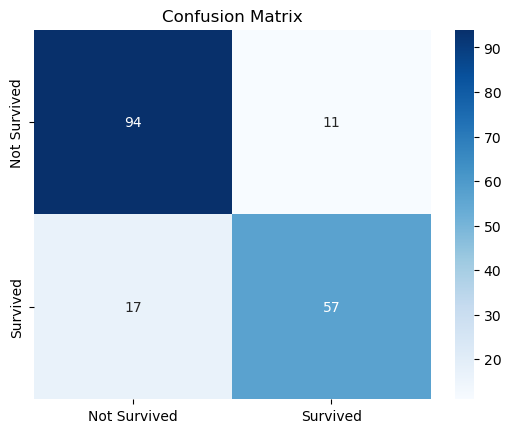

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [158]:
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))